<a href="https://colab.research.google.com/github/jelsinas/Web-Screaping-Jelsi/blob/main/Jelsi_Nasa_230907500029_Web_Screaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Semua dependencies berhasil diimport!
🔄 Memulai proses web scraping...
⚡ Pastikan Anda terhubung internet!

🚀 MEMULAI WEB SCRAPING DENGAN BEAUTIFULSOUP
🎯 Target: 2 Website berbeda dengan kategori bervariasi
📚 SCRAPING BOOKS TO SCRAPE
📖 Scraping halaman 1...
📖 Scraping halaman 2...
📖 Scraping halaman 3...
📖 Scraping halaman 4...
📖 Scraping halaman 5...
✅ Berhasil mengambil 100 data buku

💭 SCRAPING QUOTES TO SCRAPE
📝 Scraping halaman 1...
📝 Scraping halaman 2...
📝 Scraping halaman 3...
📝 Scraping halaman 4...
📝 Scraping halaman 5...
✅ Berhasil mengambil 50 data quotes

🔍 SAMPLE DATA HASIL SCRAPING
📚 SAMPLE BOOKS DATA (5 data pertama):
----------------------------------------
1. A Light in the Attic...
   💰 Harga: £51.77
   ⭐ Rating: 3/5 (Three)
   📦 Ketersediaan: In stock

2. Tipping the Velvet...
   💰 Harga: £53.74
   ⭐ Rating: 1/5 (One)
   📦 Ketersediaan: In stock

3. Soumission...
   💰 Harga: £50.10
   ⭐ Rating: 1/5 (One)
   📦 Ketersediaan: In stock

4. Sharp Objects...
   💰 Harga:

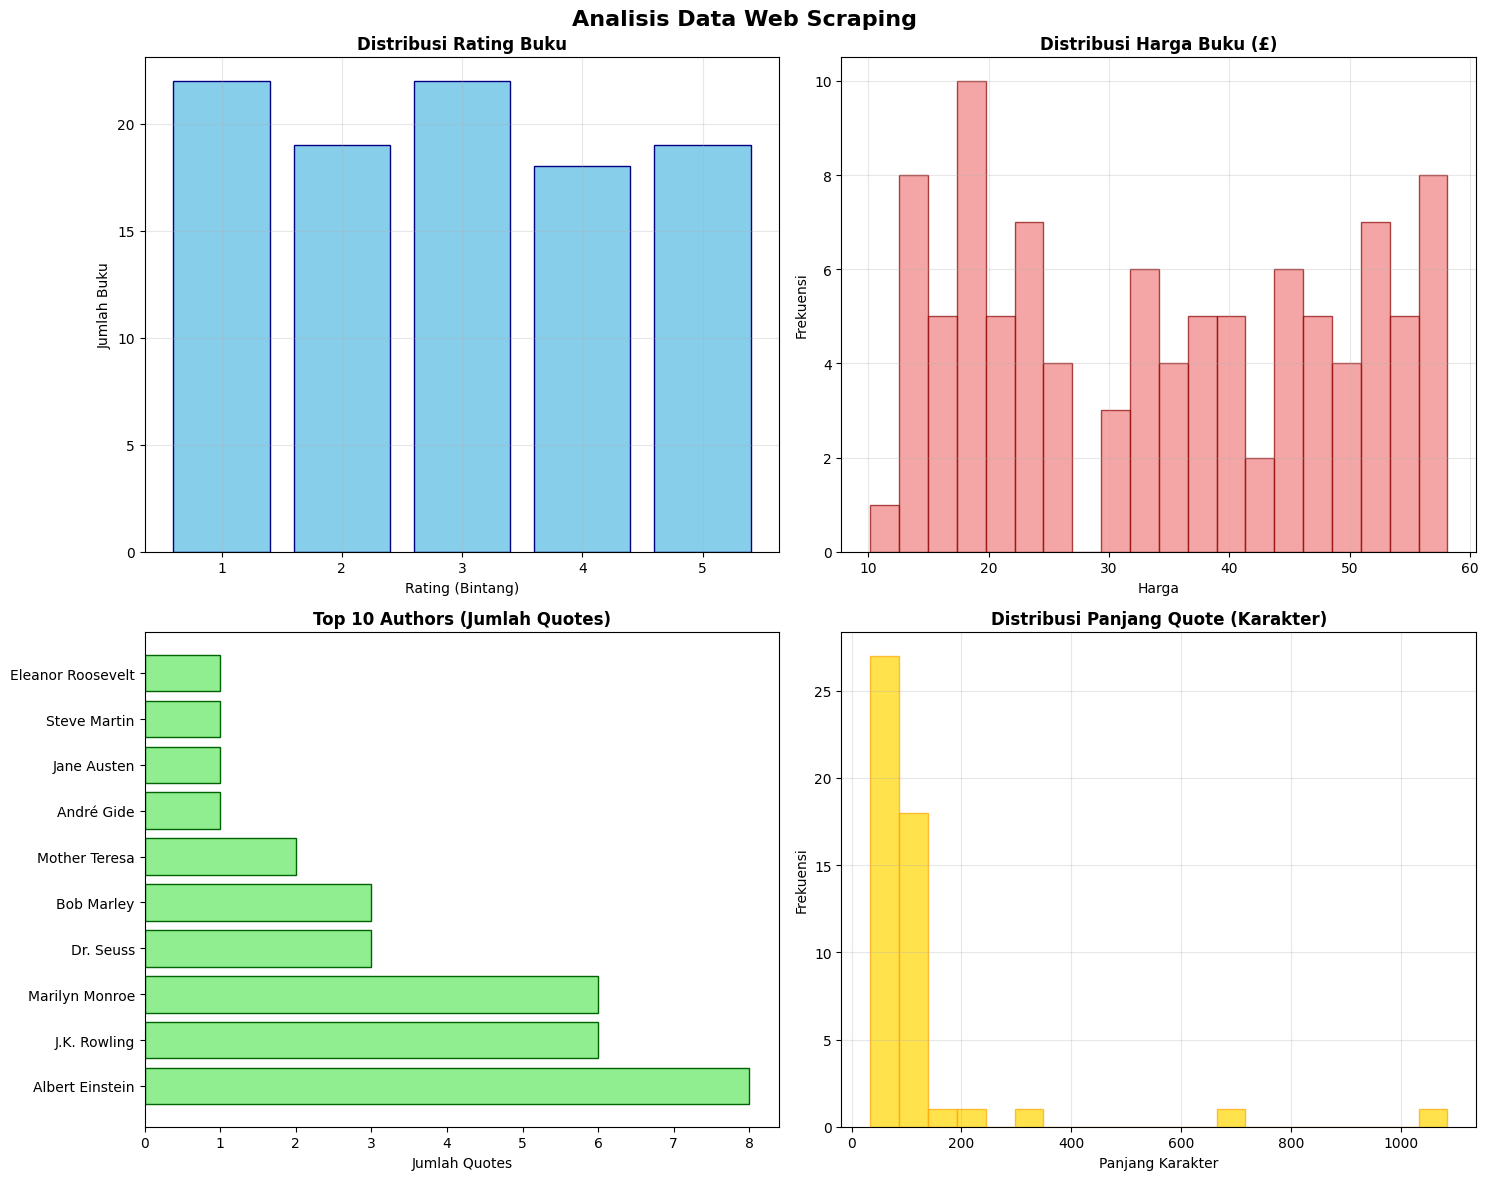


📈 STATISTIK DETAIL:
------------------------------
📚 BOOKS DATA:
  • Total buku: 100
  • Rating rata-rata: 2.9/5
  • Harga rata-rata: £34.56
  • Harga termahal: £58.11
  • Harga termurah: £10.16

💭 QUOTES DATA:
  • Total quotes: 50
  • Author unik: 28
  • Tags unik: 79
  • Quote terpendek: 34 karakter
  • Quote terpanjang: 1084 karakter
  • Tags populer: {'inspirational': 9, 'love': 9, 'life': 8, 'humor': 5, 'books': 4}

💾 MENYIMPAN DATA KE FILE...
------------------------------
✅ Books data disimpan: books_data_20250925_143809.csv
✅ Books JSON disimpan: books_data_20250925_143809.json
✅ Quotes data disimpan: quotes_data_20250925_143809.csv
✅ Quotes JSON disimpan: quotes_data_20250925_143809.json

📂 File tersimpan di direktori Colab:
-rw-r--r-- 1 root root 17222 Sep 25 14:38 books_data_20250925_143809.csv
-rw-r--r-- 1 root root 29924 Sep 25 14:38 books_data_20250925_143809.json
-rw-r--r-- 1 root root 11800 Sep 25 14:38 quotes_data_20250925_143809.csv
-rw-r--r-- 1 root root 19032 Sep 2

In [ ]:
# WEB SCRAPING DENGAN BEAUTIFULSOUP - GOOGLE COLAB VERSION
# Tugas: Scraping 2 website berbeda dengan kategori bervariasi

# Install dependencies yang belum ada (jalankan cell ini terlebih dahulu)
!pip install beautifulsoup4 lxml

# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("✅ Semua dependencies berhasil diimport!")
print("="*60)

def scrape_books_to_scrape():
    """
    Scraping website 1: http://books.toscrape.com
    Kategori: E-commerce (Buku)
    """
    print("📚 SCRAPING BOOKS TO SCRAPE")
    print("="*40)

    base_url = "http://books.toscrape.com"
    books_data = []
    page = 1
    max_pages = 5  # Batasi untuk demo

    while page <= max_pages:
        try:
            if page == 1:
                url = f"{base_url}/index.html"
            else:
                url = f"{base_url}/catalogue/page-{page}.html"

            print(f"📖 Scraping halaman {page}...")

            response = requests.get(url)
            if response.status_code == 404:
                break

            response.raise_for_status()
            soup = BeautifulSoup(response.content, 'html.parser')

            # Cari semua buku
            books = soup.find_all('article', class_='product_pod')
            if not books:
                break

            for book in books:
                try:
                    # Judul buku
                    title_elem = book.find('h3').find('a')
                    title = title_elem.get('title') if title_elem else 'N/A'

                    # Rating (dalam bentuk class stars)
                    rating_elem = book.find('p', class_='star-rating')
                    rating_class = rating_elem.get('class')[1] if rating_elem else 'N/A'

                    # Konversi rating ke angka
                    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
                    rating = rating_map.get(rating_class, 0)

                    # Harga
                    price_elem = book.find('p', class_='price_color')
                    price = price_elem.get_text() if price_elem else 'N/A'

                    # Ketersediaan
                    availability_elem = book.find('p', class_='instock availability')
                    availability = availability_elem.get_text().strip() if availability_elem else 'N/A'

                    # Link ke detail
                    link = title_elem.get('href') if title_elem else 'N/A'
                    if link != 'N/A':
                        link = f"{base_url}/catalogue/{link}"

                    books_data.append({
                        'title': title,
                        'price': price,
                        'rating': rating,
                        'rating_text': rating_class,
                        'availability': availability,
                        'link': link,
                        'page': page
                    })

                except Exception as e:
                    print(f"❌ Error parsing book: {e}")
                    continue

            page += 1
            time.sleep(1)  # Rate limiting

        except Exception as e:
            print(f"❌ Error pada halaman {page}: {e}")
            break

    print(f"✅ Berhasil mengambil {len(books_data)} data buku")
    return books_data

def scrape_quotes_to_scrape():
    """
    Scraping website 2: http://quotes.toscrape.com
    Kategori: Konten/Quotes
    """
    print("\n💭 SCRAPING QUOTES TO SCRAPE")
    print("="*40)

    base_url = "http://quotes.toscrape.com"
    quotes_data = []
    page = 1
    max_pages = 5  # Batasi untuk demo

    while page <= max_pages:
        try:
            url = f"{base_url}/page/{page}/"
            print(f"📝 Scraping halaman {page}...")

            response = requests.get(url)
            if response.status_code == 404:
                break

            response.raise_for_status()
            soup = BeautifulSoup(response.content, 'html.parser')

            # Cek jika tidak ada quotes lagi
            quotes = soup.find_all('div', class_='quote')
            if not quotes:
                break

            for quote in quotes:
                try:
                    # Text quote
                    text_elem = quote.find('span', class_='text')
                    text = text_elem.get_text() if text_elem else 'N/A'

                    # Author
                    author_elem = quote.find('small', class_='author')
                    author = author_elem.get_text() if author_elem else 'N/A'

                    # Tags
                    tag_elems = quote.find_all('a', class_='tag')
                    tags = [tag.get_text() for tag in tag_elems]

                    # About author link
                    about_elem = quote.find('a', href=lambda x: x and 'author' in x)
                    about_link = f"{base_url}{about_elem.get('href')}" if about_elem else 'N/A'

                    quotes_data.append({
                        'quote': text,
                        'author': author,
                        'tags': tags,
                        'tags_count': len(tags),
                        'quote_length': len(text),
                        'about_link': about_link,
                        'page': page
                    })

                except Exception as e:
                    print(f"❌ Error parsing quote: {e}")
                    continue

            page += 1
            time.sleep(1)  # Rate limiting

        except Exception as e:
            print(f"❌ Error pada halaman {page}: {e}")
            break

    print(f"✅ Berhasil mengambil {len(quotes_data)} data quotes")
    return quotes_data

def analyze_and_visualize_data(books_data, quotes_data):
    """
    Analisis dan visualisasi data hasil scraping
    """
    print("\n📊 ANALISIS DAN VISUALISASI DATA")
    print("="*50)

    # Setup subplot
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Analisis Data Web Scraping', fontsize=16, fontweight='bold')

    # 1. Analisis Books - Distribusi Rating
    if books_data:
        books_df = pd.DataFrame(books_data)

        # Rating distribution
        rating_counts = books_df['rating'].value_counts().sort_index()
        axes[0,0].bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='navy')
        axes[0,0].set_title('Distribusi Rating Buku', fontweight='bold')
        axes[0,0].set_xlabel('Rating (Bintang)')
        axes[0,0].set_ylabel('Jumlah Buku')
        axes[0,0].grid(True, alpha=0.3)

        # Price analysis
        # Extract numeric price
        books_df['price_numeric'] = books_df['price'].str.replace('£', '').astype(float)
        axes[0,1].hist(books_df['price_numeric'], bins=20, color='lightcoral', edgecolor='darkred', alpha=0.7)
        axes[0,1].set_title('Distribusi Harga Buku (£)', fontweight='bold')
        axes[0,1].set_xlabel('Harga')
        axes[0,1].set_ylabel('Frekuensi')
        axes[0,1].grid(True, alpha=0.3)

    # 2. Analisis Quotes
    if quotes_data:
        quotes_df = pd.DataFrame(quotes_data)

        # Top authors
        author_counts = quotes_df['author'].value_counts().head(10)
        axes[1,0].barh(author_counts.index, author_counts.values, color='lightgreen', edgecolor='darkgreen')
        axes[1,0].set_title('Top 10 Authors (Jumlah Quotes)', fontweight='bold')
        axes[1,0].set_xlabel('Jumlah Quotes')

        # Quote length distribution
        axes[1,1].hist(quotes_df['quote_length'], bins=20, color='gold', edgecolor='orange', alpha=0.7)
        axes[1,1].set_title('Distribusi Panjang Quote (Karakter)', fontweight='bold')
        axes[1,1].set_xlabel('Panjang Karakter')
        axes[1,1].set_ylabel('Frekuensi')
        axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print statistik detail
    print("\n📈 STATISTIK DETAIL:")
    print("-" * 30)

    if books_data:
        print(f"📚 BOOKS DATA:")
        print(f"  • Total buku: {len(books_data)}")
        print(f"  • Rating rata-rata: {books_df['rating'].mean():.1f}/5")
        print(f"  • Harga rata-rata: £{books_df['price_numeric'].mean():.2f}")
        print(f"  • Harga termahal: £{books_df['price_numeric'].max():.2f}")
        print(f"  • Harga termurah: £{books_df['price_numeric'].min():.2f}")

    if quotes_data:
        # Analisis tags
        all_tags = []
        for tags in quotes_df['tags']:
            all_tags.extend(tags)
        tag_counter = Counter(all_tags)

        print(f"\n💭 QUOTES DATA:")
        print(f"  • Total quotes: {len(quotes_data)}")
        print(f"  • Author unik: {quotes_df['author'].nunique()}")
        print(f"  • Tags unik: {len(tag_counter)}")
        print(f"  • Quote terpendek: {quotes_df['quote_length'].min()} karakter")
        print(f"  • Quote terpanjang: {quotes_df['quote_length'].max()} karakter")
        print(f"  • Tags populer: {dict(tag_counter.most_common(5))}")

def save_to_colab_files(books_data, quotes_data):
    """
    Menyimpan hasil scraping ke file di Google Colab
    """
    print("\n💾 MENYIMPAN DATA KE FILE...")
    print("-" * 30)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Simpan books data
    if books_data:
        books_df = pd.DataFrame(books_data)

        # CSV
        books_csv = f"books_data_{timestamp}.csv"
        books_df.to_csv(books_csv, index=False)
        print(f"✅ Books data disimpan: {books_csv}")

        # JSON
        books_json = f"books_data_{timestamp}.json"
        with open(books_json, 'w', encoding='utf-8') as f:
            json.dump(books_data, f, indent=2, ensure_ascii=False)
        print(f"✅ Books JSON disimpan: {books_json}")

    # Simpan quotes data
    if quotes_data:
        quotes_df = pd.DataFrame(quotes_data)

        # CSV
        quotes_csv = f"quotes_data_{timestamp}.csv"
        quotes_df.to_csv(quotes_csv, index=False)
        print(f"✅ Quotes data disimpan: {quotes_csv}")

        # JSON
        quotes_json = f"quotes_data_{timestamp}.json"
        with open(quotes_json, 'w', encoding='utf-8') as f:
            json.dump(quotes_data, f, indent=2, ensure_ascii=False)
        print(f"✅ Quotes JSON disimpan: {quotes_json}")

    # Tampilkan file yang tersimpan
    print(f"\n📂 File tersimpan di direktori Colab:")
    !ls -la *.csv *.json 2>/dev/null || echo "File belum tersimpan"

def display_sample_data(books_data, quotes_data):
    """
    Menampilkan sample data hasil scraping
    """
    print("\n🔍 SAMPLE DATA HASIL SCRAPING")
    print("="*50)

    # Sample books data
    if books_data:
        print("📚 SAMPLE BOOKS DATA (5 data pertama):")
        print("-" * 40)
        for i, book in enumerate(books_data[:5], 1):
            print(f"{i}. {book['title'][:60]}...")
            print(f"   💰 Harga: {book['price']}")
            print(f"   ⭐ Rating: {book['rating']}/5 ({book['rating_text']})")
            print(f"   📦 Ketersediaan: {book['availability']}")
            print()

    # Sample quotes data
    if quotes_data:
        print("💭 SAMPLE QUOTES DATA (5 data pertama):")
        print("-" * 40)
        for i, quote in enumerate(quotes_data[:5], 1):
            print(f"{i}. \"{quote['quote'][:80]}...\"")
            print(f"   👤 Author: {quote['author']}")
            print(f"   🏷️  Tags: {', '.join(quote['tags'])}")
            print(f"   📏 Panjang: {quote['quote_length']} karakter")
            print()

def main():
    """
    Fungsi utama untuk menjalankan web scraping
    """
    print("🚀 MEMULAI WEB SCRAPING DENGAN BEAUTIFULSOUP")
    print("🎯 Target: 2 Website berbeda dengan kategori bervariasi")
    print("="*60)

    start_time = time.time()

    try:
        # Scraping website 1: Books (E-commerce)
        books_data = scrape_books_to_scrape()

        # Scraping website 2: Quotes (Konten)
        quotes_data = scrape_quotes_to_scrape()

        # Tampilkan sample data
        display_sample_data(books_data, quotes_data)

        # Analisis dan visualisasi
        analyze_and_visualize_data(books_data, quotes_data)

        # Simpan ke file
        save_to_colab_files(books_data, quotes_data)

        end_time = time.time()

        print(f"\n⏱️ RINGKASAN EKSEKUSI:")
        print(f"  • Total waktu: {end_time - start_time:.2f} detik")
        print(f"  • Books scraped: {len(books_data)}")
        print(f"  • Quotes scraped: {len(quotes_data)}")
        print(f"  • Total data points: {len(books_data) + len(quotes_data)}")

        return books_data, quotes_data

    except Exception as e:
        print(f"❌ Error dalam eksekusi: {e}")
        return [], []

# JALANKAN WEB SCRAPING
print("🔄 Memulai proses web scraping...")
print("⚡ Pastikan Anda terhubung internet!")
print()

books_result, quotes_result = main()

print("\n🎉 WEB SCRAPING SELESAI!")
print("📋 Tugas berhasil diselesaikan dengan 2 website berbeda:")
print("   1. Books to Scrape (E-commerce)")
print("   2. Quotes to Scrape (Konten)")
print("✨ Data telah disimpan dan divisualisasikan!")